In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

In [17]:
df_train= pd.read_csv('SPECTF_train.csv')
df_train

1   67   68   73   78   65   63   67.1   60   63.1  ...   61.2   56.1  \
0    1   75   74   71   71   62   58     70   64     71  ...     66     62   
1    1   83   64   66   67   67   74     74   72     64  ...     67     64   
2    1   72   66   65   65   64   61     71   78     73  ...     69     68   
3    1   62   60   69   61   63   63     70   68     70  ...     66     66   
4    1   68   63   67   67   65   72     74   72     70  ...     70     70   
..  ..  ...  ...  ...  ...  ...  ...    ...  ...    ...  ...    ...    ...   
181  0   74   69   75   70   70   74     77   77     65  ...     66     67   
182  0   72   61   64   66   64   59     68   66     76  ...     69     64   
183  0   75   73   72   77   68   67     76   73     67  ...     70     67   
184  0   59   62   72   74   66   66     74   76     63  ...     65     71   
185  0   64   66   68   71   62   64     74   73     63  ...     70     69   

      76.3   75.1   74.1   77   76.4   74.2   59.1   68.3  
0       68     69     69   66     64     58     57     52  
1       69     63     68   54     65     64     43     42  
2       68     63     71   72     65     63     58     60  
3       58     56     72   73     71     64     49     42  
4       70     67     77   71     77     72     68     59  
..     ...    ...    ...  ...    ...    ...    ...    ...  
181     63     61     71   68     66     65     54     57  
182     67     71     69   68     65     73     56     52  
183     72     71     79   75     77     75     67     71  
184     67     69     77   78     77     76     70     70  
185     68     65     75   72     62     64     57     54  

[186 rows x 45 columns]

In [18]:
df_test= pd.read_csv('SPECTF_test.csv')
df_test

1   67   68   73   78   65   63   67.1   60   63.1  ...   61.2   56.1  \
0    1   75   74   71   71   62   58     70   64     71  ...     66     62   
1    1   83   64   66   67   67   74     74   72     64  ...     67     64   
2    1   72   66   65   65   64   61     71   78     73  ...     69     68   
3    1   62   60   69   61   63   63     70   68     70  ...     66     66   
4    1   68   63   67   67   65   72     74   72     70  ...     70     70   
..  ..  ...  ...  ...  ...  ...  ...    ...  ...    ...  ...    ...    ...   
181  0   74   69   75   70   70   74     77   77     65  ...     66     67   
182  0   72   61   64   66   64   59     68   66     76  ...     69     64   
183  0   75   73   72   77   68   67     76   73     67  ...     70     67   
184  0   59   62   72   74   66   66     74   76     63  ...     65     71   
185  0   64   66   68   71   62   64     74   73     63  ...     70     69   

      76.3   75.1   74.1   77   76.4   74.2   59.1   68.3  
0       68     69     69   66     64     58     57     52  
1       69     63     68   54     65     64     43     42  
2       68     63     71   72     65     63     58     60  
3       58     56     72   73     71     64     49     42  
4       70     67     77   71     77     72     68     59  
..     ...    ...    ...  ...    ...    ...    ...    ...  
181     63     61     71   68     66     65     54     57  
182     67     71     69   68     65     73     56     52  
183     72     71     79   75     77     75     67     71  
184     67     69     77   78     77     76     70     70  
185     68     65     75   72     62     64     57     54  

[186 rows x 45 columns]

In [19]:
X_train = df_train.iloc[:,1:].values
Y_train = df_train.iloc[:,0].values

In [20]:
X_train

array([[75, 74, 71, ..., 58, 57, 52],
       [83, 64, 66, ..., 64, 43, 42],
       [72, 66, 65, ..., 63, 58, 60],
       ...,
       [75, 73, 72, ..., 75, 67, 71],
       [59, 62, 72, ..., 76, 70, 70],
       [64, 66, 68, ..., 64, 57, 54]], dtype=int64)

In [21]:
Y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
X_test = df_test.iloc[:,1:].values
Y_test = df_test.iloc[:,0].values

In [23]:
X_test

array([[75, 74, 71, ..., 58, 57, 52],
       [83, 64, 66, ..., 64, 43, 42],
       [72, 66, 65, ..., 63, 58, 60],
       ...,
       [75, 73, 72, ..., 75, 67, 71],
       [59, 62, 72, ..., 76, 70, 70],
       [64, 66, 68, ..., 64, 57, 54]], dtype=int64)

In [24]:
Y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
model=LogisticRegression()
model.fit(X_train,Y_train)

c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [26]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [27]:
print('Confusion Matrix: ',confusion_matrix(Y_test,Y_pred))
print('Performance metrics: ',classification_report(Y_test,Y_pred))
print('Accuracy: ',accuracy_score(Y_test, Y_pred)*100,"%")

Confusion Matrix:  [[  7   8]
 [  2 169]]
Performance metrics:                precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.95      0.99      0.97       171

    accuracy                           0.95       186
   macro avg       0.87      0.73      0.78       186
weighted avg       0.94      0.95      0.94       186

Accuracy:  94.6236559139785 %


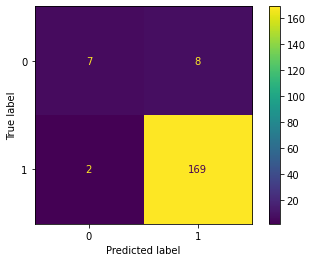

In [28]:
plot_confusion_matrix(model, X_test, Y_test)  
plt.show()